<a href="https://colab.research.google.com/github/Sejuti048/MachineLearning/blob/main/Reinforcement_Learning/Upper_Confidence_Bound/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math
N = 550 #total no of users
d = 10 #no of ads
ads_selected = []
number_of_selections = [0] * d
sums_of_selections = [0] * d
total_reward = 0
for n in range (0, N):
  ad=0
  max_upper_bound = 0
  for i in range (0, d):
    if number_of_selections[i] > 0 :
      average_reward = sums_of_selections[i]/number_of_selections[i]
      delta_i = math.sqrt(3/2 *math.log(n+1)/number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad=i
  ads_selected.append(ad)
  number_of_selections[ad] +=1
  reward = dataset.values[n, ad]
  sums_of_selections[ad] += reward
  total_reward += reward


## Visualising the results

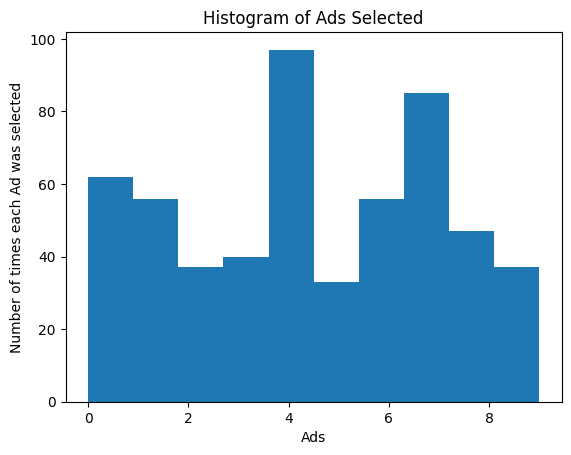

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each Ad was selected')
plt.show()